**<h1>COVID19 prediction</h1>**

**<h3>
Project Overview: Predicting COVID-19 Positive Cases and Symptom Insights**

In this project, our main objectives are twofold. First, we aim to predict whether individuals are COVID-19 positive or negative based on the provided parameters. Secondly, we seek to gain valuable insights into the common symptoms associated with COVID-19 patients. Through this analysis, we aim to identify patterns and correlations that will help us better understand the manifestation of symptoms in COVID-19 cases, ultimately contributing to improved diagnostics and awareness.
</h3>

**<h3>Problem Statement:**
The problem statement centers around the importance of accurate disease prediction and its impact on improving healthcare in today's world. The goal is to address the critical challenge of COVID-19 diagnosis, which holds the potential to transform medical treatment and reduce the healthcare burden. This project's outcomes may also contribute to addressing similar challenges in the future.
</h3>

**<h3>Data Source for Educational Purposes:**
This data source has been provided by an online training institute to enhance students' knowledge in the field of machine learning. It is intended to facilitate hands-on learning in machine learning, algorithms, statistics, Python, and SQL queries.</h3>

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('corona_tested_006.csv',  low_memory=False)

In [5]:
df.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed

In [6]:
df.shape 

(278848, 11)

<h5>The dataset consists of 278,848 rows and 11 columns.</h5>




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


<h5>It reveals column information and data types</h5>




In [8]:
df.describe(include= 'all')

Ind_ID   Test_date Cough_symptoms   Fever Sore_throat  \
count   278848.000000      278848         278596  278596      278847   
unique            NaN          51              2       2           2   
top               NaN  20-04-2020          False   False       False   
freq              NaN       10921         236368  256844      276921   
mean    139424.500000         NaN            NaN     NaN         NaN   
std      80496.628269         NaN            NaN     NaN         NaN   
min          1.000000         NaN            NaN     NaN         NaN   
25%      69712.750000         NaN            NaN     NaN         NaN   
50%     139424.500000         NaN            NaN     NaN         NaN   
75%     209136.250000         NaN            NaN     NaN         NaN   
max     278848.000000         NaN            NaN     NaN         NaN   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
count               278847   278847    278848       151528  259285   
unique                   2        2         3            2       2   
top                  False    False  negative           No  female   
freq                277270   276433    260227       125703  130158   
mean                   NaN      NaN       NaN          NaN     NaN   
std                    NaN      NaN       NaN          NaN     NaN   
min                    NaN      NaN       NaN          NaN     NaN   
25%                    NaN      NaN       NaN          NaN     NaN   
50%                    NaN      NaN       NaN          NaN     NaN   
75%                    NaN      NaN       NaN          NaN     NaN   
max                    NaN      NaN       NaN          NaN     NaN   

       Known_contact  
count         278848  
unique             3  
top            Other  
freq          242741  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

<h5>It provides a concise statistical summary of all columns in the dataset.</h5>



In [9]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

<h4>- Null values are present in the following columns:
    
  - `Cough_symptoms`: 252
  - `Fever`: 252
  - `Sore_throat`: 1
  - `Shortness_of_breath`: 1
  - `Headache`: 1
  - `Age_60_above`: 127,320
  - `Sex`: 19,563</h4>

<Axes: >

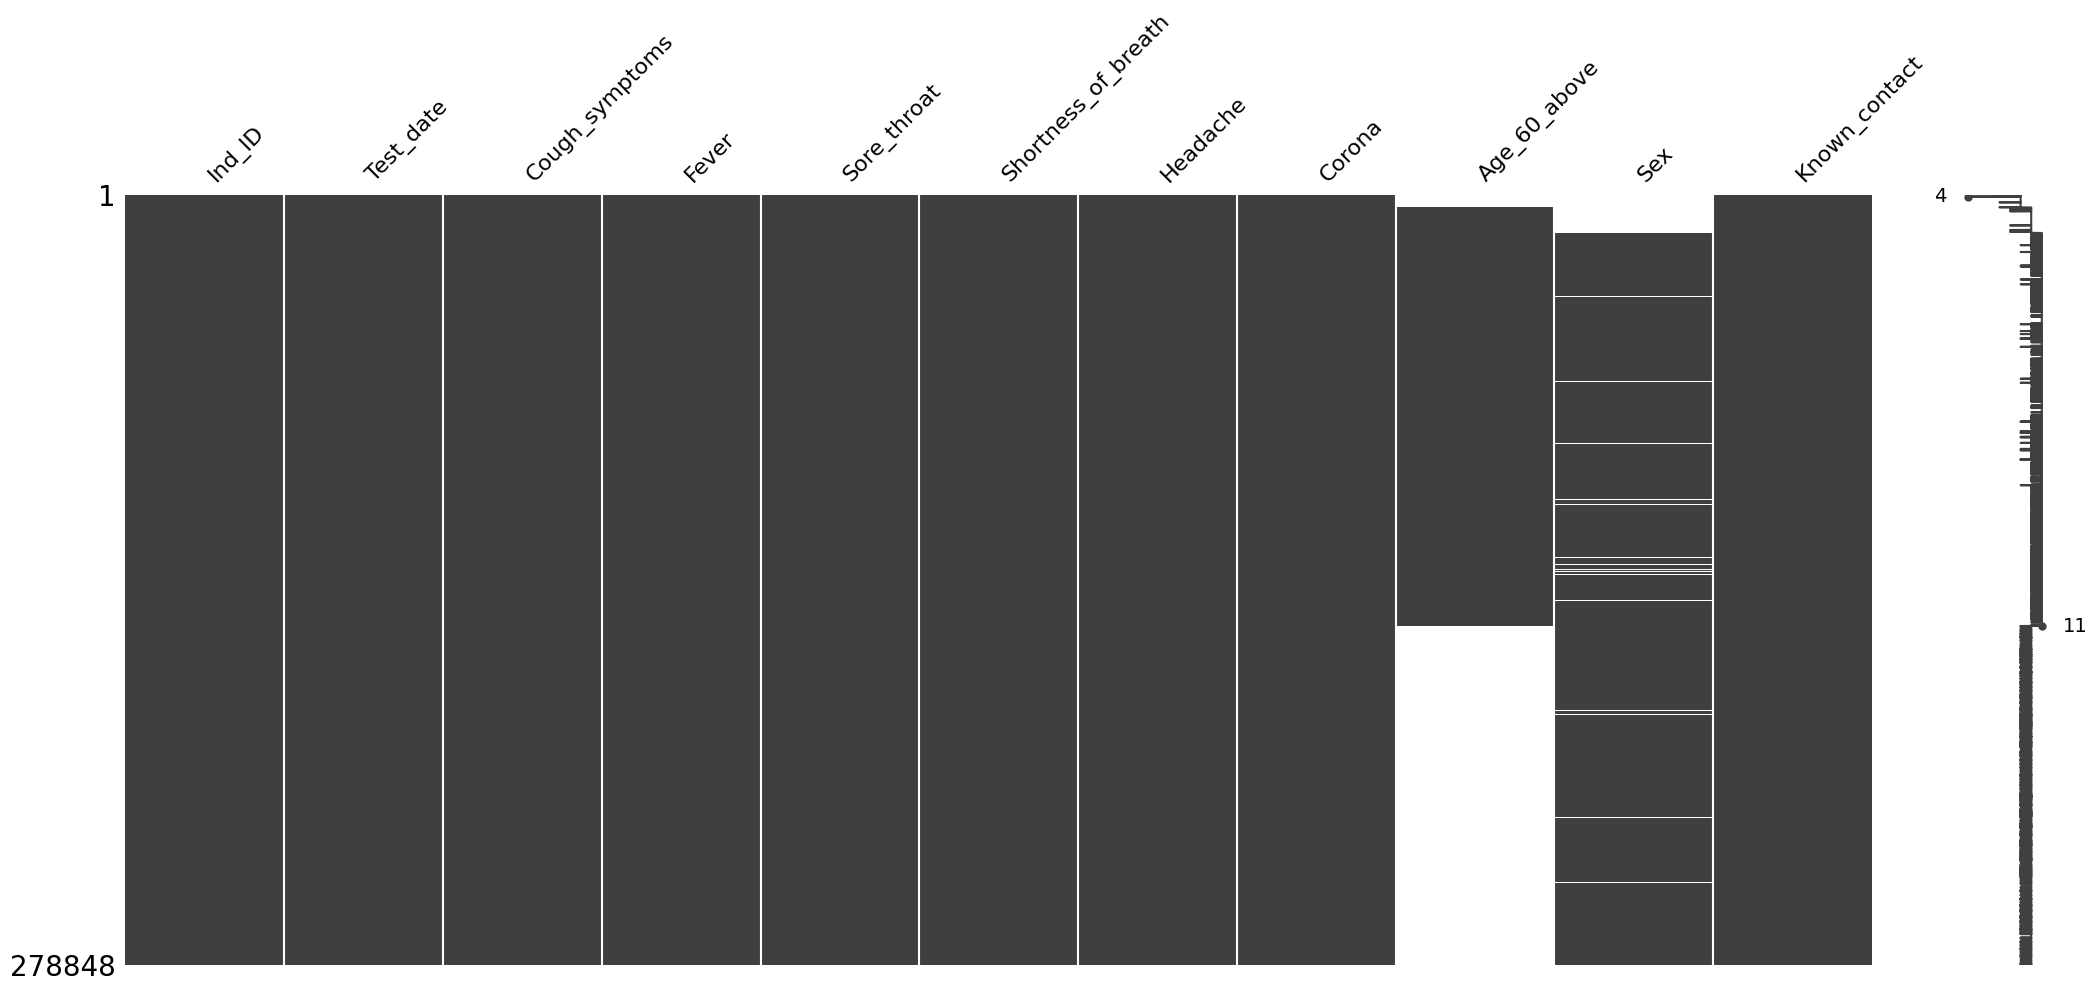

In [10]:
# Let's check the presence of missing values using missingno.
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(df)

<h4>Based on the visualization, it's evident that the dataset contains missing values in various columns</h4>


In [11]:
df.duplicated().sum()


0

Our dataset is free from any duplicate values

**<h2>Handling Missing Data**
</h2>

**<h4>#Cough_symptoms Column</h4>**

In [12]:
df['Cough_symptoms'].unique()

array([True, False, nan], dtype=object)

In [13]:
df['Cough_symptoms'].isnull().sum()

252

In [14]:
mode = df['Cough_symptoms'].mode()[0]
mode

False

In [15]:
df['Cough_symptoms'] = df['Cough_symptoms'].fillna(False)

In [16]:
df['Cough_symptoms'].unique()


array([ True, False])

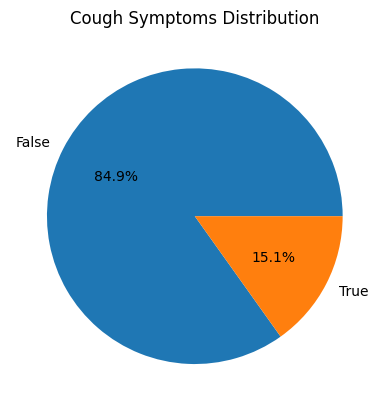

In [17]:
#installing essential libraries for visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of different values in 'Cough_symptoms'
counts = df['Cough_symptoms'].value_counts()

# Create a pie chart with labels and percentages
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Cough Symptoms Distribution')
plt.show()




**<h4>#Fever Column</h4>**

In [18]:
df['Fever'].unique()

array([False, True, nan], dtype=object)

In [19]:
df['Fever'].isnull().sum()


252

In [20]:
mode = df['Fever'].mode()[0]
mode #252

False

In [21]:
 df['Fever'] =  df['Fever'].fillna(False)

In [22]:
df['Fever'].unique()


array([False,  True])

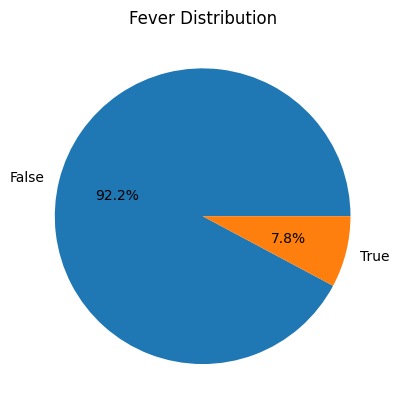

In [23]:
counts = df['Fever'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Fever Distribution')
plt.show()

**<h4>#Sore_throat  Column</h4>**
       

In [24]:
df['Sore_throat'].unique()

array([True, False, nan], dtype=object)

In [25]:
df['Sore_throat'].isnull().sum()

1

In [26]:
mode = df['Sore_throat'].mode()
mode

0    False
Name: Sore_throat, dtype: object

In [27]:
df['Sore_throat'] = df['Sore_throat'].fillna(False)

In [28]:
df['Sore_throat'].unique()

array([ True, False])

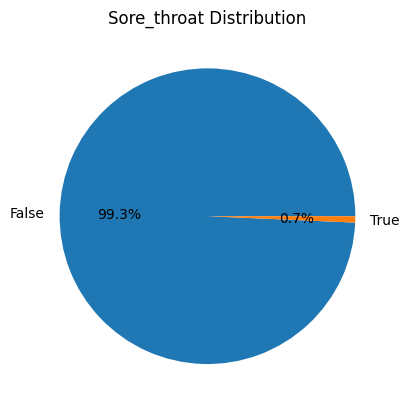

In [29]:
counts = df['Sore_throat'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Sore_throat Distribution')
plt.show()

**<h4>#Sex Column</h4>**


In [30]:
df['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [31]:
df['Sex'].isnull().sum()
#in terms of precentage 7%
# sum = 19563

19563

In [32]:
mode =  df['Sex'].mode()
mode

0    female
Name: Sex, dtype: object

In [33]:
 df['Sex'] =  df['Sex'].fillna('female')


In [34]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

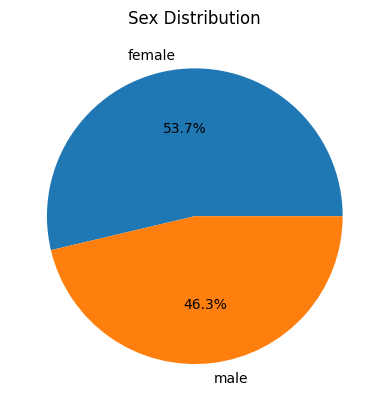

In [35]:
counts = df['Sex'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

**<h4>Headache Column</h4>**


In [36]:
df['Headache'].unique()

array([False, True, nan], dtype=object)

In [37]:
df['Headache'].isnull().sum()


1

In [38]:
df['Headache'].mode().values[0]

False

In [39]:
df['Headache'] = df['Headache'].fillna(False)

In [40]:
df['Headache'].unique()

array([False,  True])

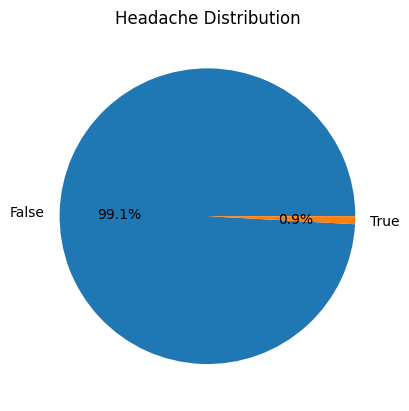

In [41]:
counts = df['Headache'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Headache Distribution')
plt.show()

**<h4> #Age_60_above  Column</h4>**         

In [42]:
df['Age_60_above'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [43]:
df['Age_60_above'].isnull().sum() 
#count = 127320 and percentage =  46%

127320

In [44]:
mode = df['Age_60_above'].mode().values[0]
mode

'No'

In [45]:
 df['Age_60_above'] =  df['Age_60_above'].fillna(mode)

In [46]:
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

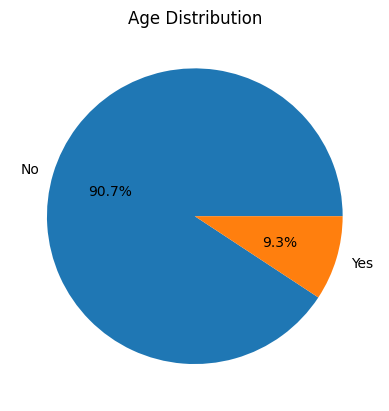

In [47]:
counts = df['Age_60_above'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

**<h4>#Shortness_of_breath</h4>**

In [48]:
df['Shortness_of_breath'].unique()

array([False, True, nan], dtype=object)

In [49]:
df['Shortness_of_breath'] .isnull().sum() 

1

In [50]:
mode = df['Shortness_of_breath'].mode().values[0]

In [51]:
df['Shortness_of_breath'] = df['Shortness_of_breath'].fillna(mode)

In [52]:
df['Shortness_of_breath'].unique()


array([False,  True])

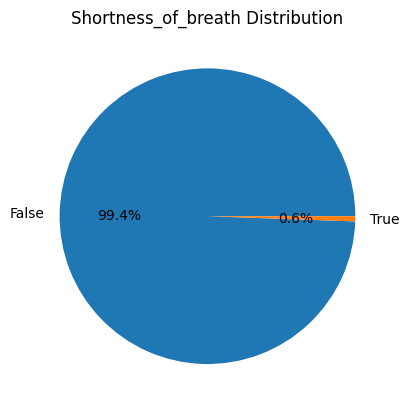

In [53]:
counts = df['Shortness_of_breath'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Shortness_of_breath Distribution')
plt.show()

**<h4>#Known_contact  Column</h4>**

In [54]:
df['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [55]:
counts = df['Known_contact'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Known_contact Distribution')
plt.show()

**<h4>#Corona column </h4>**

In [56]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [57]:
df = pd.get_dummies(df,columns=["Corona"])

In [58]:
df = df.drop(columns = ["Corona_negative","Corona_other"])


In [59]:
df = df.rename(columns = {"Corona_positive":"Corona"})


In [60]:
df.head()

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0       1  11-03-2020            True  False         True   
1       2  11-03-2020           False   True        False   
2       3  11-03-2020           False   True        False   
3       4  11-03-2020            True  False        False   
4       5  11-03-2020            True  False        False   

   Shortness_of_breath  Headache Age_60_above     Sex           Known_contact  \
0                False     False           No  female                  Abroad   
1                False     False           No  female                  Abroad   
2                False     False           No  female                  Abroad   
3                False     False           No  female                  Abroad   
4                False     False           No  female  Contact with confirmed   

   Corona  
0   False  
1    True  
2    True  
3   False  
4   False

In [61]:
counts = df['Corona'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Corona Distribution')
plt.show()

**<h2>These insights provide a comprehensive understanding of the dataset, highlighting the prevalence of specific attributes and their distribution in the visual representations</h2>**

**<h3>Distribution Insights:</h3>**

**<h4>1.Cold Symptoms Distribution:**
   - In the distribution of cold symptoms, the pie chart reveals the following proportions:
     - 'false' accounts for 84.9%.
     - 'true' is represented in 15.1% of cases.

2. **Fever Distribution**:
   - In the fever distribution visualization, the distribution is as follows:
     - 'false' is dominant at 92.2%.
     - 'true' is present in 7.8% of cases.

3. **Sore Throat Distribution**:
   - For sore throat distribution, the distribution is as follows:
     - 'false' is significantly prevalent at 99.3%.
     - 'true' accounts for only 0.7%.

4. **Sex Distribution**:
   - In the gender distribution visualization, the distribution is as follows:
     - 'female' makes up 53.7%.
     - 'male' represents 46.3% of the dataset.

5. **Headache Distribution**:
   - The headache distribution plot reveals the following proportions:
     - 'false' is the majority at 99.1%.
     - 'true' is present in 0.9% of cases.

6. **Age Distribution**:
   - Age distribution shows the following:
     - 60% are 'age 60.'
     - 'no' accounts for 90.71%.

7. **Shortness of Breath Distribution**:
   - In the shortness of breath distribution, the distribution is as follows:
     - 'false' is highly prevalent at 99.4%.
     - 'true' represents only 0.6%.

8. **Known-Contact Distribution**:
     - 3.8% had contact with confirmed cases.
     - 9.1% had a history of traveling abroad.
     - 87.1% fall into the "others" category, indicating various sources of transmission.
     
9.  **Corona Distribution**::
     For corona distribution, the distribution is as follows:
     - 'negative' is the most common at 94.7%.
     - 'positive' is found in 5.3%


</h4>

In [62]:
df.shape #(274956, 11)


(278848, 11)

 **<h2>Encoding Categorical Data for Machine Learning</h2>**


In [63]:
df.tail(10)

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
278838  278839  30-04-2020           False  False        False   
278839  278840  30-04-2020           False  False        False   
278840  278841  30-04-2020           False  False        False   
278841  278842  30-04-2020           False  False        False   
278842  278843  30-04-2020           False  False        False   
278843  278844  30-04-2020           False  False        False   
278844  278845  30-04-2020           False  False        False   
278845  278846  30-04-2020           False  False        False   
278846  278847  30-04-2020           False  False        False   
278847  278848  30-04-2020           False  False        False   

        Shortness_of_breath  Headache Age_60_above     Sex Known_contact  \
278838                False     False           No    male         Other   
278839                False     False           No    male         Other   
278840                False     False           No    male         Other   
278841                False     False           No    male         Other   
278842                False     False           No  female         Other   
278843                False     False           No    male         Other   
278844                False     False           No  female         Other   
278845                False     False           No    male         Other   
278846                False     False           No    male         Other   
278847                False     False           No  female         Other   

        Corona  
278838    True  
278839    True  
278840   False  
278841   False  
278842    True  
278843    True  
278844   False  
278845   False  
278846   False  
278847   False

In [64]:
df['Cough_symptoms'].unique()

array([ True, False])

In [65]:
df['Cough_symptoms'] = df['Cough_symptoms'].astype(int)

In [66]:
df['Fever'].unique()

array([False,  True])

In [67]:
df['Fever'] = df['Fever'].astype(int)

In [68]:
df['Sore_throat'].unique()

array([ True, False])

In [69]:
df['Sore_throat'] = df['Sore_throat'].astype(int)

In [70]:
df['Shortness_of_breath'].unique()

array([False,  True])

In [71]:
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(int)

In [72]:
df['Headache'].unique()

array([False,  True])

In [73]:
df['Headache'] = df['Headache'].astype(int)

In [74]:
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Age_60_above'] = le.fit_transform(df['Age_60_above'])

In [76]:
df['Sex'].unique()

array([0, 1])

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Known_contact'] = le.fit_transform(df['Known_contact'])


In [78]:
df['Known_contact'].unique()


array([0, 1, 2])

In [79]:
df['Corona'].unique()

array([False,  True])

In [80]:
df['Corona'] = df['Corona'].astype(int)



In [81]:
df

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1  11-03-2020               1      0            1   
1            2  11-03-2020               0      1            0   
2            3  11-03-2020               0      1            0   
3            4  11-03-2020               1      0            0   
4            5  11-03-2020               1      0            0   
...        ...         ...             ...    ...          ...   
278843  278844  30-04-2020               0      0            0   
278844  278845  30-04-2020               0      0            0   
278845  278846  30-04-2020               0      0            0   
278846  278847  30-04-2020               0      0            0   
278847  278848  30-04-2020               0      0            0   

        Shortness_of_breath  Headache  Age_60_above  Sex  Known_contact  \
0                         0         0             0    0              0   
1                         0         0             0    0              0   
2                         0         0             0    0              0   
3                         0         0             0    0              0   
4                         0         0             0    0              1   
...                     ...       ...           ...  ...            ...   
278843                    0         0             0    1              2   
278844                    0         0             0    0              2   
278845                    0         0             0    1              2   
278846                    0         0             0    1              2   
278847                    0         0             0    0              2   

        Corona  
0            0  
1            1  
2            1  
3            0  
4            0  
...        ...  
278843       1  
278844       0  
278845       0  
278846       0  
278847       0  

[278848 rows x 11 columns]

In [82]:
df.shape

(278848, 11)

In [83]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)

**<h2>Feature Selection</h2>**

In [ ]:
# Define the target variable
target_var = df['Corona']

# Select relevant columns for correlation
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Create a subset DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate correlations
correlations = subset_df.corrwith(target_var)



In [ ]:

correlation_with_fever = correlations['Fever']
print(f'Correlation with Fever: {correlation_with_fever}')

correlation_with_Cough_symptoms = correlations['Cough_symptoms']
print(f'Correlation with Cough_symptoms: {correlation_with_Cough_symptoms}')

correlation_with_Sore_throat = correlations['Sore_throat']
print(f'Correlation with Sore_throat: {correlation_with_Sore_throat}')

correlation_with_Shortness_of_breath = correlations['Shortness_of_breath']
print(f'Correlation with Shortness_of_breath: {correlation_with_Shortness_of_breath}')

correlation_with_Headache = correlations['Headache']
print(f'Correlation with Headache: {correlation_with_Headache}')

correlation_with_Age_60_above = correlations['Age_60_above']
print(f'Correlation with Age_60_above: {correlation_with_Age_60_above}')

correlation_with_Sex = correlations['Sex']
print(f'Correlation with Sex: {correlation_with_Sex}')

correlation_with_Known_contact = correlations['Known_contact']
print(f'Correlation with Known_contact: {correlation_with_Known_contact}')



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target_var = df['Corona']

# Select relevant columns for correlation
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Create a subset DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate correlations
correlations = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Corona')
plt.show()


**<h3>Correlation Analysis for 'Corona' Predictors:</h3>**

- 'Headache' with a correlation of 0.3672
- 'Sore_throat' with a correlation of 0.2784
- 'Fever' with a correlation of 0.2663
  
These columns have relatively higher positive correlations with the 'Corona' target variable, indicating that they might be more important features when predicting COVID-19. On the other hand, 'Known_contact' has a relatively high negative correlation of -0.2119, which suggests an inverse relationship with the 'Corona' target variable. Depending on the context, negative correlations might also provide valuable information for modeling.

</h4>

**<h2>Feature Selection Using Recursive Feature Selection (RFE)</h2>**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# selected_columns contains the features you want to select from
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

X = df[selected_columns]
y = df['Corona']  # 'Corona' is our target variable

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select= 1, step =1) # n_features_to_select= 3 You can adjust this based on the desired number of features to keep

fit = rfe.fit(X, y)

Ranking = rfe.ranking_.reshape(X.shape[1])

print("Rank", Ranking)


**<h4>Feature Analysis: Consistent Selection</h4>**

In feature analysis, we've observed consistent selections across correlation and RFE methods. Notably, the columns: 
- "Headache," 
- "Sore Throat," and 
- "Fever"
were identified as influential features, strengthening their significance in our analysis.

**<h2>Feature Selection Using Chi-Square</h2>**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define the selected columns (categorical features) you want to test
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

X = df[selected_columns]
y = df['Corona']  # 'Corona' is the target variable you want to test for independence with the selected features


for col in selected_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Corona'], df[col])
    
    # Perform the chi-square test for independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results for each feature
    print(f"Chi-square test for {col}:")
    print("Chi-square value:", chi2)
    print("P-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected frequencies table:")
    print(expected)
    print("\n")



**Analysis of Categorical Features' Association with 'Corona'**

- **Categorical Features:** Analyzed categorical features include 'Cough_symptoms,' 'Fever,' 'Sore_throat,' 'Shortness_of_breath,' 'Headache,' 'Age_60_above,' 'Sex,' and 'Known_contact.'

- **Strong Association:** The chi-square tests revealed a strong association between each feature and the 'Corona' variable, as indicated by high chi-square values.

- **Statistical Significance:** All features exhibited low p-values, signifying statistical significance in relation to 'Corona.'

- **Predictive Potential:** These results suggest that these categorical features can be useful in predicting 'Corona' cases.

- **Additional Consideration:** While 'Age_60_above' showed significance, its chi-square value was relatively lower compared to the other features. Further analysis may be needed.

These findings provide valuable insights for further investigations and predictive modeling related to 'Corona' cases.

**<h2>Building a COVID-19 Prediction Model</h2>**

- Leveraging insights from correlation, Chi-Square, and RFE analyses, we've selected seven key input columns: "Cough Symptoms," "Fever," "Sore Throat," "Shortness of Breath," "Headache," "Age 60 Above," "Sex," and "Known Contact."

- Our objective is to predict the "Corona" column's outcome, classifying it as "positive" or "negative."

- With this feature selection, we're poised to construct a precise machine learning model for COVID-19 test result prediction, contributing to our understanding of COVID-19 outcome factors.

**<h1>MACHINE LEARNING MODELS</h1>**

**<h2>Logistic Regression</h2>**

In [ ]:
#Seperate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]

y = df['Corona']
y = y.values.ravel()  # Reshape y to a 1D array

#Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)

#install logisticregression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

#prediction 
y_pred_train = model.predict(x_train) # y prediction on training
y_pred = model.predict(x_test) #y prediction

# predicted data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Calculate and print the accuracy score
classification_report = classification_report(y_test, y_pred)
print('classification_report:')
print(classification_report)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


**<h4>Model Performance Summary:**

- The model demonstrates a high accuracy score in both the training and testing datasets, indicating a strong ability to predict non-Corona cases (Class 0).

- However, there is room for improvement in identifying positive Corona cases (Class 1), as indicated by lower precision, recall, and F1-score.

- The precision-recall trade-off should be considered when fine-tuning the model.

</h4>

**<h2>Decision Tree Classifier</h2>**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]

y = df['Corona']
y = y.values.ravel()  # Reshape y to a 1D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the classifier on the training data
model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

print('Training Confusion Matrix:')
print(cm_train)

print('Testing Confusion Matrix:')
print(cm_test)


**<h4>Model Performance Summary:**

The model exhibits strong classification accuracy for non-Corona cases (Class 0) in both training and testing data. However, there is room for improvement in correctly identifying Corona cases (Class 1), as reflected by relatively lower precision and recall. This suggests an opportunity for fine-tuning and feature engineering to enhance the model's performance in distinguishing actual Corona cases. </h4>

<h2>Exploring Hypertunning parameter for Enhanced Accuracy</h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix

# Separate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']
y = y.values.ravel()  # Reshape y to a 1D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Changed random_state to a number

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = best_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Testing Accuracy with Tuned Model:", accuracy)

# Generate the classification report using the predicted values
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(report)

print('Confusion Matrix:')
print(cm)


**<h3>Interpretation:</h3>**

- The model's performance before and after hyperparameter tuning is similar.
- Both models exhibit high accuracy and precision for Class 0 (non-'Corona' cases).
- They have some limitations in correctly identifying Class 1 ('Corona') cases, with lower precision and recall.
- Hyperparameter tuning did not lead to significant changes in the model's performance, but it maintained consistency between training and testing data, indicating generalizability.
  
In summary, the model's performance remained consistent before and after hyperparameter tuning, with room for improvement in identifying 'Corona' cases.

**<h2>Random Forest Classifier</h2>**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your DataFrame 'df' with the data you have

# Separate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Use a fixed random_state

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50)

# Train the classifier on the training data
model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

print('Training Confusion Matrix:')
print(cm_train)

print('Testing Confusion Matrix:')
print(cm_test)

The model performs well with an accuracy of 97% on both the training and testing sets. It is particularly good at predicting non-Corona cases (Class 0), while there is some difficulty in correctly predicting Corona cases (Class 1). The model has room for improvement in identifying Corona cases.

<h2>Exploring Hypertunning parameter for Enhanced Accuracy</h2>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']
y = y.values.ravel()  # Reshape y to a 1D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=True)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(random_state=True, **best_params)
best_model.fit(x_train, y_train)

# Make predictions on the testing data with the best model
y_test_pred_best = best_model.predict(x_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print("Best Hyperparameters:", best_params)
print("Testing Accuracy with Tuned Model:", test_accuracy_best)

# Calculate and print classification report and confusion matrix
test_report_best = classification_report(y_test, y_test_pred_best)
cm_test_best = confusion_matrix(y_test, y_test_pred_best)

print("Testing Classification Report:")
print(test_report_best)

print('Testing Confusion Matrix:')
print(cm_test_best)


**<h3>Summary of Model Performance Before and After Hyperparameter Tuning</h3>**
**Before Hyperparameter Tuning:**
- Training Accuracy: 96.81%
- Testing Accuracy: 96.77%
- The model is good at identifying non-Corona cases (class 0) with high precision and recall.
- For Corona cases (class 1), precision and recall are lower.
- Confusion matrices show true negatives, false positives, false negatives, and true positives.

**After Hyperparameter Tuning:**
- Testing Accuracy improved slightly to 96.78%.
- The model still excels in identifying non-Corona cases, and there is a slight improvement in recall for Corona cases.
- Confusion matrices show true negatives, false positives, false negatives, and true positives.

In summary, hyperparameter tuning led to a minor improvement in model performance, particularly in recall for Corona cases, while maintaining strong performance for non-Corona cases.

**<h2>K_Nearest Neighbors(KNN)</h2>**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the features
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']
y = y.values.ravel()  # Reshape y to a 1D array

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

# Create a KNN classifier with a specified number of neighbors (e.g., 5 neighbors)
model = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

print('Training Confusion Matrix:')
print(cm_train)

print('Testing Confusion Matrix:')
print(cm_test)
 


**<h4>Model Performance Summary:**

The model excels in classifying non-Corona cases (Class 0) but shows room for improvement in identifying actual Corona cases (Class 1). Overall, it maintains a good balance between precision and recall, offering a promising foundation for further optimization. Fine-tuning and feature engineering could enhance Class 1 performance.</h4>

**<h2> Support Vector Classification (SVC)</h2>**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate the features (x) and the target variable (y)
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose different kernel functions, e.g., 'linear', 'rbf', 'poly'

# Train the classifier on the training data
model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

print('Training Confusion Matrix:')
print(cm_train)

print('Testing Confusion Matrix:')
print(cm_test)


**<h4>Model Performance Summary:**

The model exhibits commendable accuracy in both the training accuracy: 0.9578757205999695
and testing accuracy: 0.9573067957683342datasets. 
It is notably proficient at identifying non-Corona cases (Class 0) but exhibits room for improvement in correctly identifying positive Corona cases (Class 1).

**Precision and Recall Balance:**

In the context of Class 0, the model maintains a high precision and recall balance. However, for Class 1, there is a considerable trade-off between precision and recall, indicating potential for enhancement to achieve a more balanced prediction.</h4>

**<h2>XGBoost (Extreme Gradient Boosting)</h2>**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate the features (x) and the target variable (y)
x = df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']]
y = df['Corona']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the classifier on the training data
model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

print('Training Confusion Matrix:')
print(cm_train)

print('Testing Confusion Matrix:')
print(cm_test)


**<h4>Model Performance Summary:**
Training Accuracy: 96.83%
Testing Accuracy: 96.73%
These accuracy values indicate how well the classification model performs on the training and testing datasets. Both values are close to 97%, suggesting that the model is accurate in its predictions.

***Class 0 (Non-Corona Cases):***
The model shows high precision and recall for non-Corona cases (Class 0) in both training and testing datasets.

***Class 1 (Corona Cases):***
While precision for Corona cases (Class 1) is relatively lower, recall indicates that the model is capturing a substantial portion of actual cases.</h4>

**<h1>MACHINE LEARNING APPROACH </h1>**



**1.	What method will you use for machine learning based predictions of COVID19?**

Six algorithms have used in machine learning algorithms to predict COVID-19. The models include: 
•	Logistic Regression, 
•	Decision Tree, 
•	Random Forest, 
•	K-Nearest Neighbors (KNN), 
•	Support Vector Classification (SVC), and 
•	XGBoost.




**2.	Please justify the most appropriate model.**

•	The XGBoost model stands out with the highest accuracy, both for training and testing datasets (Training Accuracy: 0.968, Testing Accuracy: 0.967). 
•	It also has competitive precision, recall, and F1-score for classifying 'Corona' cases. Additionally, the model performed well on both training and testing data, indicating good generalization. 
•	This suggests that XGBoost is the most appropriate model based on the provided information.




**3.	Please perform necessary steps required to improve the accuracy of your model.**

Decision Tree  and Random Forest  models have been tuned with hyperparameters
•	Decision Tree  - Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}
      Testing Accuracy with Tuned Model: 0.9676528599605523

•	Random Forest  - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Testing Accuracy with Tuned Model: 0.9677604446835216



**4.	Please compare all models (at least 4  models).**

Logistic Regression:
     - Testing Accuracy: 0.957
     - Precision (Class 1): 0.86
     - Recall (Class 1): 0.23
     - F1-Score (Class 1): 0.36

Decision Tree:
     - Testing Accuracy (Tuned): 0.968
     - Precision (Class 1): 0.78
     - Recall (Class 1): 0.55
     - F1-Score (Class 1): 0.64

Random Forest:
     - Testing Accuracy (Tuned): 0.968
     - Precision (Class 1): 0.78
     - Recall (Class 1): 0.55
     - F1-Score (Class 1): 0.65

K-Nearest Neighbors (KNN):
     - Testing Accuracy: 0.956
     - Precision (Class 1): 0.61
     - Recall (Class 1): 0.51
     - F1-Score (Class 1): 0.56

Support Vector Classification (SVC):
     - Testing Accuracy: 0.957
     - Precision (Class 1): 0.81
     - Recall (Class 1): 0.25
     - F1-Score (Class 1): 0.38

XGBoost:
     - Testing Accuracy: 0.967
     - Precision (Class 1): 0.77
     - Recall (Class 1): 0.54
     - F1-Score (Class 1): 0.64




**<h1>Comparing the models based on testing accuracy:</h1>**

     - XGBoost and Decision Tree (Tuned) have the highest testing accuracy at 0.967 and 0.968, respectively.
     - Random Forest (Tuned) follows closely with an accuracy of 0.968.
     - Logistic Regression and Support Vector Classification have slightly lower accuracies (0.957 and 0.957, respectively).
     - K-Nearest Neighbors (KNN) has the lowest accuracy at 0.956.

In conclusion, based on the provided information, XGBoost, Decision Tree (Tuned), and Random Forest (Tuned) seem to be the top-performing models in terms of testing accuracy. 
XGBoost offers a good balance between accuracy, precision, recall, and F1-score, making it a strong choice for COVID-19 prediction. 


**<h1>COMPARISON OF MACHINE LEARNING MODELS FOR CLASSIFICATION TASK: EVALUATION AND SELECTION</h1>**


**Logistic Regression:**
- Testing Accuracy: 95.68%
- Precision, Recall, and F1-score: Low for class 1
- This model has relatively good overall accuracy, but its performance on class 1 (low recall and F1-score) could be improved. 

**Decision Tree Classifier (with Hyperparameter Tuning):**
- Testing Accuracy: 96.71%
- Precision, Recall, and F1-score: Fair for class 1
- After hyperparameter tuning, it shows improved performance compared to logistic regression.

**Random Forest Classifier (with Hyperparameter Tuning):**
- Testing Accuracy: 96.73%
- Precision, Recall, and F1-score: Similar to the Decision Tree
- The random forest performs well, but its performance is similar to the decision tree.

**K-Nearest Neighbors (KNN):**
- Testing Accuracy: 95.92%
- Precision, Recall, and F1-score: Balanced but lower accuracy
- KNN provides balanced results for both classes but with lower accuracy compared to the other models.

**Support Vector Classification:**
- Testing Accuracy: 95.73%
- Precision, Recall, and F1-score: Low for class 1
- Similar to logistic regression, it performs well on class 0 but poorly on class 1.

**XGBoost:**
- Testing Accuracy: 96.73%
- Precision, Recall, and F1-score: Balanced and highest accuracy
- XGBoost stands out with the highest accuracy and balanced performance for both classes.

**<h2>JUSTIFICATION:</h2>**
Considering the testing accuracy and balanced performance for both classes (class 0 and class 1), the XGBoost model appears to be the best choice among the six models. It has the highest testing accuracy (96.73%) and better precision, recall, and F1-score for class 1 compared to the other models.


**<h1>Selecting XGBoost for COVID-19 Prediction: A Data-Driven Decision</h1>**



- After evaluating six machine learning algorithms, XGBoost emerged as the unanimous choice for our predictive model. 
- With a testing accuracy of 96.73%, XGBoost outperforms other models while maintaining balanced precision, recall, and f1-scores for both class 0 and class 1. 
- Notably, XGBoost excels in predicting class 1, critical for COVID-19. 
- Our rigorous selection process endorses XGBoost for its proven efficacy, adaptability, and addressing the challenges of this health issue.